# Emotion AI: NRC Affect Intensity Lexicon

Anaysis by Frank Flavell

## Overview

As part of the emmotional classification process, I want to calculate an emotion score for each utterance.  This would be a function in the NLU pipeline with the following operations:
   * Take in the utterance and tokenize it
   * Compare each token in the utterance to a lexicon of words associated with the six emotion classes.
   * Add up the intensity scores of each word associated with each emotion.
   * Determine which emotion(s) exceed a specific threshold and can be confidently classified with those emotions.

The score(s) would help to determine which emotion(s) the utterance is associated with and also address the possibility of multiple emotions in one sentence.


## Dataset

The data I will be using is from an incredible emotional-linguistic initiative from the National Research Council (NRC) of Canada.  The [Affect Intensity Lexicon](http://sentiment.nrc.ca/lexicons-for-research/) groups words associated with an overarching emotion and provides an intensity score for each word.  For example, "outraged" has an anger intensity of 0.964 while "grumpy" has in anger intensity of 0.328.  Intensity scores are calculated using Best-Worst Scaling where the level of association is mathmatically calculated.

I will be using the lexicons for the following emotions:
   * Anger
   * Disgust
   * Fear
   * Sadness
   * Joy (for happiness)
   * Surprise


## Table of Contents<span id="0"></span>

1. [**Import Anger**](#1)
<br/><br/>
2. [**Build Import Function**](#2)
<br/><br/>
3. [**Import Remaining Emotions**](#3)
<br/><br/>
4. [**Combine Emotions into nrc_lex**](#4)
<br/><br/>
5. [**Export to Pickle**](#5)

## Package Import

In [1]:
# import external libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import re #regex

# Configure matplotlib for jupyter.
%matplotlib inline

## Data Import & Cleaning

The data comes in 6 different .txt files, one for each emotion. In all files, each line contains one word with its intensity score.  I will import each txt file into a dataframe and combine them into one dataframe that can be subset if necessary.

## <span id="1"></span>1. Import Anger
#### [Return Contents](#0)

In [2]:
anger = pd.read_csv("data/nrc/anger-scores.txt", delimiter='\t', header=None)
anger.columns = ["word", "score"]

In [3]:
anger.head()

,word,score
0,outraged,0.964
1,brutality,0.959
2,hatred,0.953
3,hateful,0.940
4,terrorize,0.939


In [4]:
anger.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 2 columns):
word     1483 non-null object
score    1483 non-null float64
dtypes: float64(1), object(1)
memory usage: 23.3+ KB


In [5]:
anger['emotion'] = 1

In [6]:
anger.head()

,word,score,emotion
0,outraged,0.964,1
1,brutality,0.959,1
2,hatred,0.953,1
3,hateful,0.940,1
4,terrorize,0.939,1


## <span id="2"></span>2. Build Import Function
#### [Return Contents](#0)

In [7]:
def lex_to_df(file_path=str, emo_num=int):
    df = pd.read_csv(file_path, delimiter='\t', header=None)
    df.columns = ["word", "score"]
    df['emotion'] = emo_num
    return df

## <span id="3"></span>3. Import Remaining Emotions
#### [Return Contents](#0)

After importing all the remaining emotions, the total number of words in the lexicon with intensity scores is 7,493.  The question is, how well will this dataset match up with everyday conversation and give me the ability to associate a score with each utterance?

In [8]:
disgust = lex_to_df("data/nrc/disgust-scores.txt", 2)

In [9]:
disgust.head()

,word,score,emotion
0,cannibalism,0.953,2
1,mutilation,0.930,2
2,incest,0.914,2
3,molestation,0.914,2
4,gonorrhea,0.906,2


In [10]:
disgust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 3 columns):
word       1094 non-null object
score      1094 non-null float64
emotion    1094 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 25.8+ KB


In [11]:
fear = lex_to_df("data/nrc/fear-scores.txt", 3)

In [12]:
fear.head()

,word,score,emotion
0,torture,0.984,3
1,terrorist,0.972,3
2,horrific,0.969,3
3,terrorism,0.969,3
4,terrorists,0.969,3


In [13]:
fear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 3 columns):
word       1765 non-null object
score      1765 non-null float64
emotion    1765 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 41.5+ KB


In [14]:
happy = lex_to_df("data/nrc/joy-scores.txt", 4)

In [15]:
happy.head()

,word,score,emotion
0,happiest,0.986,4
1,happiness,0.984,4
2,bliss,0.971,4
3,celebrating,0.970,4
4,jubilant,0.969,4


In [16]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 3 columns):
word       1268 non-null object
score      1268 non-null float64
emotion    1268 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 29.8+ KB


In [17]:
sad = lex_to_df("data/nrc/sadness-scores.txt", 5)

In [18]:
sad.head()

,word,score,emotion
0,heartbreaking,0.969,5
1,mourning,0.969,5
2,tragic,0.961,5
3,holocaust,0.953,5
4,suicidal,0.941,5


In [19]:
sad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1298 entries, 0 to 1297
Data columns (total 3 columns):
word       1298 non-null object
score      1298 non-null float64
emotion    1298 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 30.5+ KB


In [20]:
surprise = lex_to_df("data/nrc/surprise-scores.txt", 6)

In [21]:
surprise.head()

,word,score,emotion
0,surprise,0.930,6
1,explode,0.906,6
2,flabbergast,0.906,6
3,explosion,0.898,6
4,eruption,0.883,6


In [22]:
surprise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 585 entries, 0 to 584
Data columns (total 3 columns):
word       585 non-null object
score      585 non-null float64
emotion    585 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 13.8+ KB


In [23]:
len(anger.word) + len(disgust.word) + len(fear.word) + len(happy.word) + len(sad.word) + len(surprise.word)


7493

## <span id="4"></span>4. Combine Emotions
#### [Return Contents](#0)

After concatenating the dataframes together, the shape should be 7,493 x 3.

In [24]:
nrc_lex = pd.concat([anger, disgust, fear, happy, sad, surprise])

In [25]:
nrc_lex

,word,score,emotion
0,outraged,0.964,1
1,brutality,0.959,1
2,hatred,0.953,1
3,hateful,0.940,1
4,terrorize,0.939,1
...,...,...,...
580,peaceful,0.086,6
581,leisure,0.086,6
582,tree,0.078,6
583,picnic,0.078,6


The shape is right on. Now I reset index values for the new dataframe.

In [26]:
nrc_lex.reset_index(drop=True, inplace=True)

In [27]:
nrc_lex

,word,score,emotion
0,outraged,0.964,1
1,brutality,0.959,1
2,hatred,0.953,1
3,hateful,0.940,1
4,terrorize,0.939,1
...,...,...,...
7488,peaceful,0.086,6
7489,leisure,0.086,6
7490,tree,0.078,6
7491,picnic,0.078,6


In [28]:
nrc_lex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7493 entries, 0 to 7492
Data columns (total 3 columns):
word       7493 non-null object
score      7493 non-null float64
emotion    7493 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 175.7+ KB


I want to make sure every string in the word column is lowercase so there are no issues when matching words from other utterances with the words in the lexicon.

In [29]:
nrc_lex.word.apply(lambda x: x.lower())

0        outraged
1       brutality
2          hatred
3         hateful
4       terrorize
          ...    
7488     peaceful
7489      leisure
7490         tree
7491       picnic
7492         worm
Name: word, Length: 7493, dtype: object

In [30]:
nrc_lex.head()

,word,score,emotion
0,outraged,0.964,1
1,brutality,0.959,1
2,hatred,0.953,1
3,hateful,0.940,1
4,terrorize,0.939,1


## <span id="5"></span>5. Export to Pickle
#### [Return Contents](#0)

Now I export the updated data to a pickle so I can use it when engineering the emotion score feature in my feature engineering notebook.

In [31]:
nrc_lex.to_pickle("data/nrc/eai_nrc_lex.pickle")

## <span id="6"></span>6. EDA
#### [Return Contents](#0)

**Of all the 7,493 observations, how many unique words are in entire lexicon?  Are there any words shared between emotions?**

Of the 7,493 words in the lexicon, only 4,700 are unique, which means that one word can belong to more than one emotion class.  We will need to address this during feature engineering.

**How many words are in each emotion class?**

The distribution of words is fairly even across emotions.  Surprise is the lowest at 585 and fear is the highest at 1,765.  We will see how well our model is at recognizing those eureka moments when people come to a deeper understanding through dialogue with Emotional AI.

**How many words are above and below 50% intensity?**

Overall, The distribution of words above and below 50% is almost even with 3,677 words above 50% intensity and 3,637 below 50%.

**What is the overall distribution of scores?**

The distribution of words within each emotion class is fairly evenly distributed. With some slight variation in the minimum and maximum intensity scores, the intensities are well represented across classes.

### Unique Words

In [51]:
all_words = list(nrc_lex.word)
len(all_words)

7493

In [52]:
unique_words = set(all_words)
len(unique_words)

4700

Only 4,700 of the 7,493 words are unique.  For example, the word "angry" has been assigned to both the anger and disgust class.

In [44]:
nrc_lex[nrc_lex.word == 'angry']

,word,score,emotion
106,angry,0.824,1
2090,angry,0.469,2


### Number of Words in Each Class

In [33]:
emotions = nrc_lex.groupby('emotion').count()
emotions

,word,score
emotion,,
1,1483,1483
2,1094,1094
3,1765,1765
4,1268,1268
5,1298,1298
6,585,585


In [34]:
labels = ['Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']


Text(0, 0.5, 'Number of Associated Words')

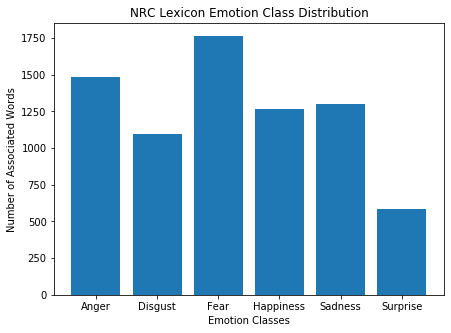

In [35]:
plt.figure(figsize=(7,5))
plt.bar(emotions.index, emotions['word'], tick_label=labels)
plt.title('NRC Lexicon Emotion Class Distribution')
plt.xlabel('Emotion Classes')
plt.ylabel('Number of Associated Words')

### Distribution of Intensity Scores

In [36]:
sc_above = nrc_lex[nrc_lex.score > .50].count()
sc_above

word       3677
score      3677
emotion    3677
dtype: int64

In [37]:
sc_above[0]

3677

In [38]:
sc_below = nrc_lex[nrc_lex.score < .50].count()
sc_below

word       3637
score      3637
emotion    3637
dtype: int64

In [39]:
x = ['Above 50%', 'Below 50%']
y = [sc_above[0], sc_below[0]]

Text(0, 0.5, 'Number of Words')

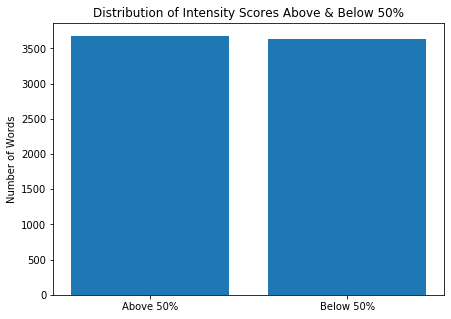

In [40]:
plt.figure(figsize=(7,5))
plt.bar(x, y, tick_label=('Above 50%', 'Below 50%'))
plt.title('Distribution of Intensity Scores Above & Below 50%')
plt.ylabel('Number of Words')

In [41]:
nrc_lex.describe()

,score,emotion
count,7493.000000,7493.000000
mean,0.500123,3.208061
std,0.205204,1.568282
min,0.000000,1.000000
25%,0.348000,2.000000
50%,0.500000,3.000000
75%,0.656000,5.000000
max,0.986000,6.000000


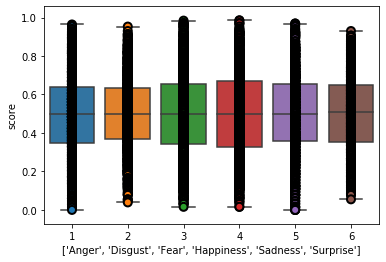

In [42]:
sns.boxplot(x='emotion', y='score', data=nrc_lex)
sns.stripplot(x='emotion', y='score', data=nrc_lex, 
              size=8, jitter=False, edgecolor="black", linewidth=2)
plt.xlabel(labels)
plt.show()